# WER - Open Mini-Challenge

## Wie viele Elektroautos werden im Jahr 2030 in der Schweiz verkauft?
Da die Anzahl an Elektroautos in der Schweiz stark steigt, wollen wir herausfinden, wie viele im Jahr 2030 verkauft werden. Für die Berechnung haben wir verschiedene Zufallsvariablen definiert, deren Entwicklung bis 2030 die Anzahl verkaufte Elektroautos beeinflussen könnten.

Wir haben uns für die folgenden fünf Zufallsvariabeln entschieden:

- Recihweite
- Antriebskosten
- Preis Elektroauto relativ zu Verbrenner
- Batteriekosten
- Subventionen



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

### Reichweite
Für die Zufallsvariable "Reichweite" haben wir die zehn Elektroautos mit den grössten Reichweiten der letzten 4 Jahre rausgesucht und dazu ein Diagramm aufgestellt. 

In [6]:
df_reichw = pd.read_csv("Reichweiten.csv")
df_reichw

,Rang,2021,2020,2019,2018
0,1,785,663,610,610
1,2,663,580,560,560
2,3,630,565,505,505
3,4,610,550,470,415
4,5,591,480,463,450
5,6,580,471,455,400
6,7,560,470,450,380
7,8,550,455,450,300
8,9,540,450,423,280
9,10,536,446,411,270


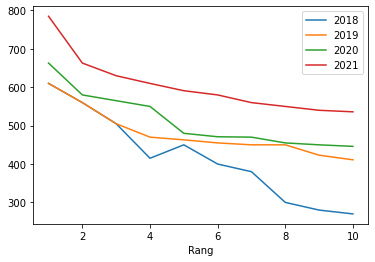

In [7]:
df_reichw.plot(x="Rang", y=["2018", "2019", "2020", "2021"])
plt.show()

Anhand dieses Diagrammes sieht man, dass die Reichweite der Top 10 E-Autos von Jahr zu Jahr steigt. Das 10. Auto (Rang 10) war in 2018 bei ungefähr 270km und in 2021 bei 536km.

Jetzt müssen wir die Werte für die unbekannten Jahre ausrechnen (2022 - 2030):
Für jedes Jahr müssen folgende Werte berechnet werden:
- Erwartungswert
- Sigma
- COV (Sigma : Erwartungswert)

In [8]:
# Ergibt normierte Standardabweichung
# Variationskoeffizient: prozentuale Verhältnis der Standardabweichung zum Mittwelwert.
def calc_cov(mittelwert, sigma):
    return sigma / mittelwert

In [9]:
# Vorhandene Erwartungswerte in eienr Liste hinzufügen
mit_reichw = []
mit_reichw.append(np.mean(df_reichw["2018"]))
mit_reichw.append(np.mean(df_reichw["2019"]))
mit_reichw.append(np.mean(df_reichw["2020"]))
mit_reichw.append(np.mean(df_reichw["2021"]))

# Standardabweichungen für jedes Jahr berechnen und in einer Liste hinzufügen
stab_reichw = []
stab_reichw.append(np.std(df_reichw["2018"]))
stab_reichw.append(np.std(df_reichw["2019"]))
stab_reichw.append(np.std(df_reichw["2020"]))
stab_reichw.append(np.std(df_reichw["2021"]))

# Variationskoeffizient berechnen
cov_reichw = [calc_cov(mit_reichw[i], stab_reichw[i]) for i in range(4)]

# Durchschnitt Variationskoeffizient
mit_cov_reichw = np.mean(cov_reichw)

In [10]:
# In Excel ausgerechnete Mittelwerte für die unbekannten Jahre 2022 - 2030 (TREND)
mit_reichw_neu = [653.0, 712.7, 772.4, 832.1, 891.8, 951.5, 1011.2, 1070.9, 1130.6]

# Standardabweichungen für die unbekannten Jahre
stab_reichw_neu = [i * mit_cov_reichw for i in mit_reichw_neu]

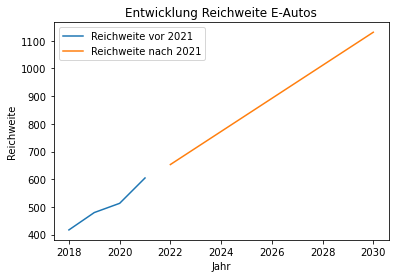

In [11]:
jahren_vor = list(range(2018, 2022))
jahren_nach = list(range(2022, 2031))

plt.plot(jahren_vor, mit_reichw, label = "Reichweite vor 2021")
plt.plot(jahren_nach, mit_reichw_neu, label = "Reichweite nach 2021")
plt.xlabel('Jahr')
plt.ylabel('Reichweite')
plt.title('Entwicklung Reichweite E-Autos')
plt.legend(loc="upper left")
plt.show()

Anhand des Diagramms sieht man, wie die Reichweite linear steigt. Bei 2030 währe die Reichweite im Schnitt somit bei ca. 1130km. Da wir zwei verschiedene Listen für den Plot gebraucht haben, gibt es zwischen 2021 und 2022 eine Lücke.

#### Reichweite 2021 - Wahrscheinlichkeitsverteilung  

In [12]:
# Funktion für die Wahrscheinlichkeitsverteilung
def plot_distr(dataframe, x_val):
    sns.set_style('white')
    sns.set_context("paper", font_scale = 1.5)
    sns.displot(data = dataframe, x = x_val, kind = "hist", bins = 150, aspect = 3.0)   

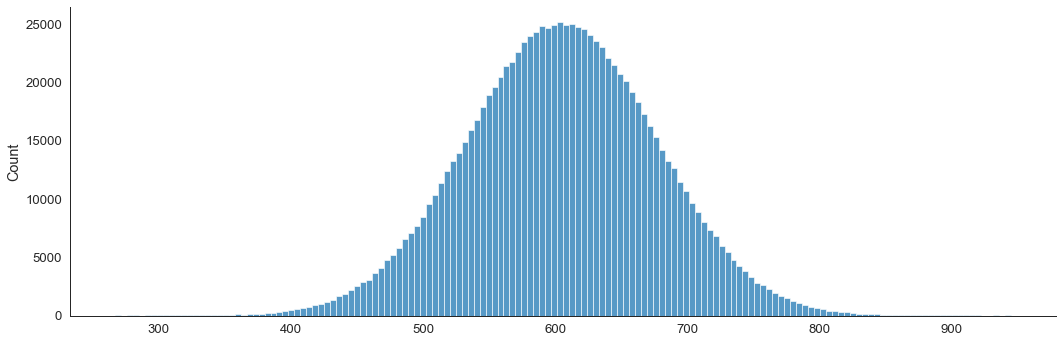

In [13]:
reichw_2021 = mit_reichw[3]
stab_reichw_2021 = stab_reichw[3]

sim_reichweite = np.random.normal(reichw_2021, stab_reichw_2021, 1_000_000)
df_sim_reichweite = pd.DataFrame(sim_reichweite)
plot_distr(df_sim_reichweite, sim_reichweite)

#### Reichweite 2030 - Wahrscheinlichkeitsverteilung 

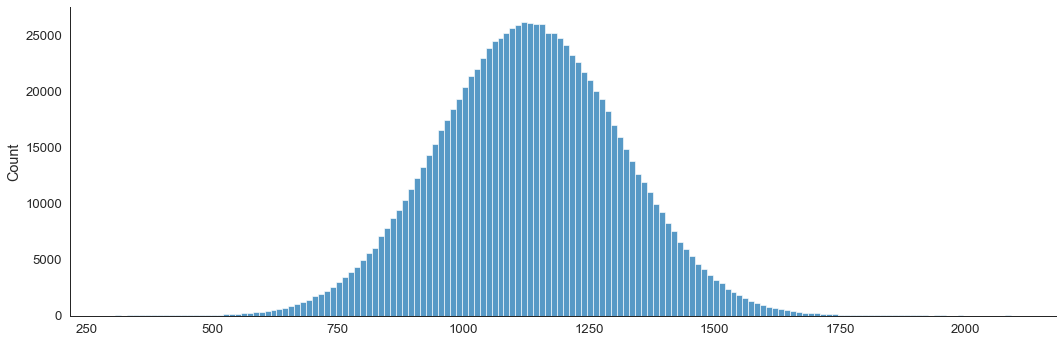

In [14]:
reichw_2030 = mit_reichw_neu[-1]
stab_reichw_2030 = stab_reichw_neu[-1]

sim_reichweite = np.random.normal(reichw_2030, stab_reichw_2030, 1_000_000)
df_sim_reichweite = pd.DataFrame(sim_reichweite)
plot_distr(df_sim_reichweite, sim_reichweite)

**Delta Reichweite 2021 - 2030**

In [15]:
delta_reichw_2030 = reichw_2030 - reichw_2021
print("Delta Reichweite 2021 - 2030: {}".format(delta_reichw_2030))

Delta Reichweite 2021 - 2030: 526.0999999999999


#### Delta Reichweite 2021 - 2030 - Wahrscheinlichkeitsverteilung 

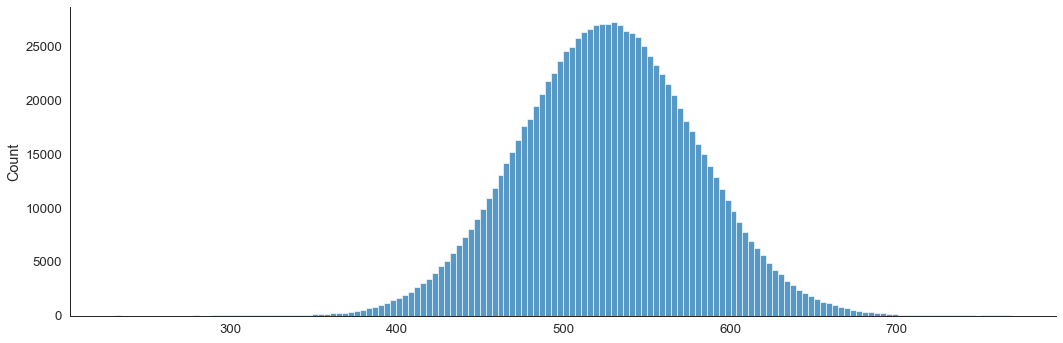

In [16]:
stab_delta_reichw_2030 = delta_reichw_2030 * 0.1

sim_delta_reichw_2030 = np.random.normal(delta_reichw_2030, stab_delta_reichw_2030, 1_000_000)
df_sim_delta_reichw_2030 = pd.DataFrame(sim_delta_reichw_2030)
plot_distr(df_sim_delta_reichw_2030, sim_delta_reichw_2030)

### Antriebskosten

Als nächste Zufallsvariable berechnen wir die Antriebskosten. Diese haben einen geopolitischen Einfluss und dadurch entsteht eine aleatorische Unsicherheit.

In [17]:
df_antriebkosten = pd.read_csv("Antriebkosten.csv")
df_antriebkosten

,Jahr,Bleifrei(95),Bleifrei(98),Diesel,KWH
0,2010,1.640,1.69,1.72,0.2400
1,2011,1.730,1.78,1.86,0.2416
2,2012,1.810,1.86,1.93,0.2318
3,2013,1.770,1.83,1.89,0.2295
4,2014,1.720,1.78,1.82,0.2312
5,2015,1.490,1.56,1.55,0.2370
6,2016,1.410,1.48,1.45,0.2379
7,2017,1.510,1.59,1.58,0.2378
8,2018,1.630,1.72,1.74,0.2430
9,2019,1.600,1.69,1.74,0.2443


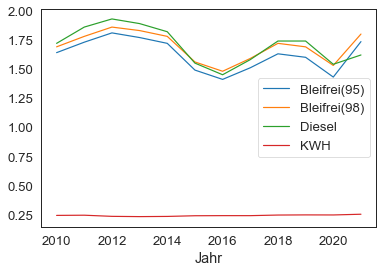

In [18]:
df_antriebkosten.plot(x="Jahr", y=["Bleifrei(95)", "Bleifrei(98)", "Diesel", "KWH"])
plt.show()

Im Plot sieht man die Entwicklung der Preise pro Liter und pro kWh. Wir gehen davon aus, dass die E-Autos ausschliesslich zuhause geladen werden. Der Preis dafür liegt heutzutage bei 0.24.- pro kWh.

**Antriebskosten (2010 - 2030)**

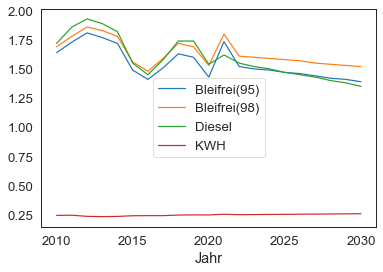

In [19]:
df_antriebkosten_trend = pd.read_csv("Antriebkosten_Trend.csv")
df_antriebkosten_trend.plot(x="Jahr", y=["Bleifrei(95)", "Bleifrei(98)", "Diesel", "KWH"])
plt.show()

Für Benzin setzen wir den Variationskoeffizienten auf 0.2. Dann unterteilen wir die Daten in zwei Listen. (1. vor 2021, 2. nach 2021)

In [20]:
mit_cov_antrieb = 0.2
mit_bleifrei = []
mit_bleifrei_neu = []

for i in range(len(df_antriebkosten_trend["Bleifrei(95)"])):
    # Werte von 2010 - 2021 zu einer Liste hinzufügen
    if i <= 11:
        mit_bleifrei.append(df_antriebkosten_trend["Bleifrei(95)"][i])
    # Werte von 2022 - 2030 zu einer Liste hinzufügen
    else:
        mit_bleifrei_neu.append(df_antriebkosten_trend["Bleifrei(95)"][i])

Für die Extrapolation reicht es, wenn wir nur einen Kraftstoff nehmen, da sie alle etwa die gleiche Entwicklung aufweisen. Wir entscheiden uns für **Bleifrei 95**.

Wir werden die Entwicklung vom kWh-Preis nicht modellieren, da diese sehr konstant bleibt.

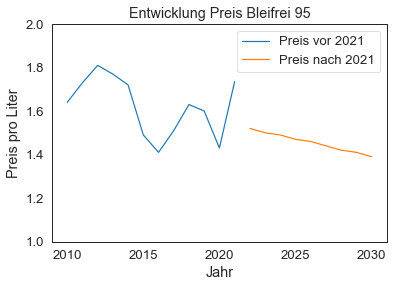

In [21]:
jahren_vor = list(range(2010, 2022))
jahren_nach = list(range(2022, 2031))

plt.plot(jahren_vor, mit_bleifrei, label = "Preis vor 2021")
plt.plot(jahren_nach, mit_bleifrei_neu, label = "Preis nach 2021")
plt.xlabel("Jahr")
plt.ylabel("Preis pro Liter")
plt.title("Entwicklung Preis Bleifrei 95")
plt.legend(loc="upper right")
plt.ylim(1, 2)
plt.show()

Anhand des Diagramms sieht man, wie der Preis des Kraftstoffes ab 2021 linear sinkt. Da wir zwei verschiedene Listen für den Plot gebraucht haben, gibt es zwischen 2021 und 2022 eine Lücke.

#### Antriebskosten 2021 - Wahrscheinlichkeitsverteilung 

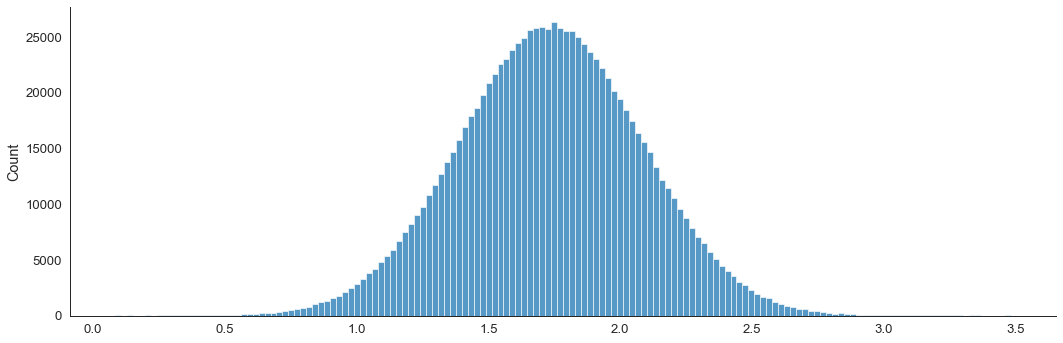

In [22]:
mit_bleifrei_2021 = mit_bleifrei[11]
stab_bleifrei_2021 = mit_bleifrei_2021 * mit_cov_antrieb

sim_bleifrei_2021 = np.random.normal(mit_bleifrei_2021, stab_bleifrei_2021, 1_000_000)
df_sim_bleifrei_2021 = pd.DataFrame(sim_bleifrei_2021)
plot_distr(df_sim_bleifrei_2021, sim_bleifrei_2021)

#### Antriebskosten 2030 - Wahrscheinlichkeitsverteilung 

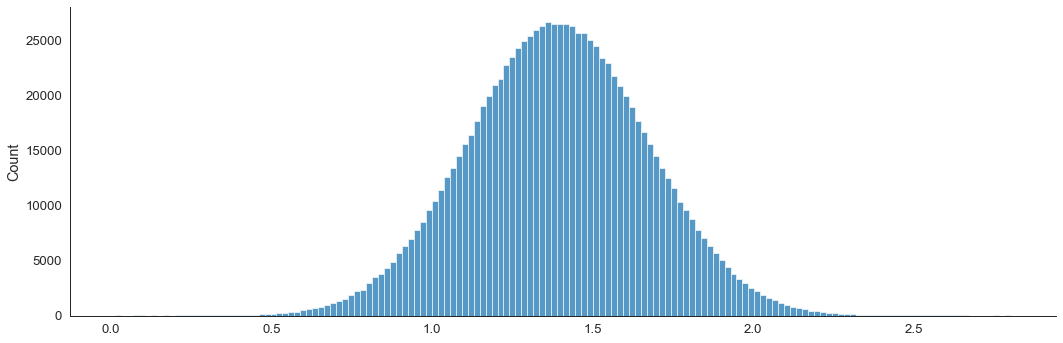

In [23]:
mit_bleifrei_2030 = mit_bleifrei_neu[-1]
stab_bleifrei_2030 = mit_bleifrei_2030 * mit_cov_antrieb

sim_bleifrei_2030 = np.random.normal(mit_bleifrei_2030, stab_bleifrei_2030, 1_000_000)
df_sim_bleifrei_2030 = pd.DataFrame(sim_bleifrei_2030)
plot_distr(df_sim_bleifrei_2030, sim_bleifrei_2030)

#### Delta Antriebskosten 2021 - 2030

In [24]:
delta_bleifrei_2030 = mit_bleifrei_2021 - mit_bleifrei_2030
print("Delta Bleifrei 2021 - 2030: {}".format(delta_bleifrei_2030))

Delta Bleifrei 2021 - 2030: 0.3450000000000002


#### Delta Antriebskosten 2021 - 2030 - Wahrscheinlichkeitsverteilung

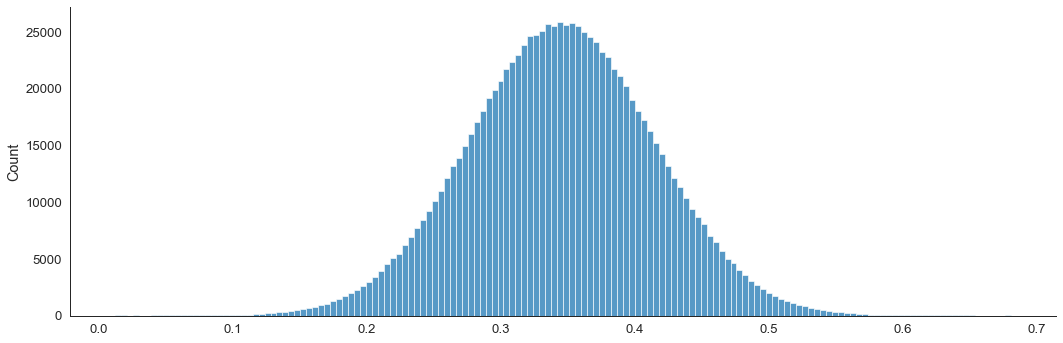

In [25]:
stab_delta_bleifrei_2030 = delta_bleifrei_2030 * mit_cov_antrieb

sim_delta_bleifrei_2030 = np.random.normal(delta_bleifrei_2030, stab_delta_bleifrei_2030, 1_000_000)
df_sim_delta_bleifrei_2030 = pd.DataFrame(sim_delta_bleifrei_2030)
plot_distr(df_sim_delta_bleifrei_2030, sim_delta_bleifrei_2030)

### Preis Elektroauto relativ zu Verbrenner
Für diesen Vergleich haben wir 8 identische Autos genommen, die es als Elektro und als Verbrenner gibt.

In [27]:
df_auto_preise = pd.read_csv("Autopreise_e_vs_v.csv")
df_auto_preise

,Auto,Elektro Preis,Verbrenner Preis
0,BMW i4,69900,56400
1,Mini Cooper,37900,26000
2,Opel Corsa,35000,19000
3,Opel Grandland,44260,32450
4,Opel Mokka,36200,26200
5,Opel Combo Life,40800,26460
6,Peugeot 208,33000,18500
7,Volvo xc40,59500,36840


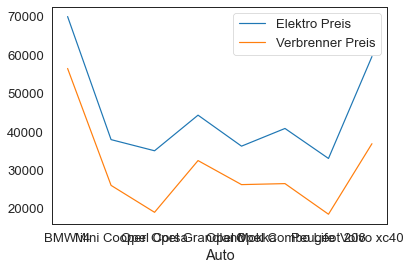

In [28]:
df_auto_preise.plot(x="Auto", y=["Elektro Preis", "Verbrenner Preis"])
plt.show()

In [29]:
mit_e_preis = np.mean(df_auto_preise["Elektro Preis"])
mit_v_preis = np.mean(df_auto_preise["Verbrenner Preis"])

print("Mittelwert Elektro: {}".format(mit_e_preis))
print("Mittelwert Verbrenner: {}".format(mit_v_preis))

Mittelwert Elektro: 44570.0
Mittelwert Verbrenner: 30231.25


Anhand der Daten sieht man, dass der Preisunterschied zwischen Elektro - und Verbrennerautos konstant ca. CHF 10'000 beträgt . Dies war bereits in der Vergangenheit der Fall. Daher gehen wir davon aus, dass sich das auch in Zukunft nicht ändern wird und rechnen mit CHF 10'000 Unterschied. Die Subventionen und die günstigeren Batterien rechnen wir erst später mit dazu.

### Batteriekosten

Vor zehn Jahren galt ein Elektroauto noch als unbezahlbar. Damals kostete die Kilowattstunde (kWh) einer Lithium-Ionen-Batterie rund 1'100 Franken. Seitdem sind die Preise in einem rasanten Tempo gefallen: um mehr als 89 Prozent auf 137 Franken pro kWh in 2020.


Noch dazu sammelten wir folgende Daten der Swiss E-Mobility:
- Die Akkupreise sind seit Anfang des Jahrzehnt um 87% gesunken.
- Der preis für einen Akku wird sich bis 2025 nochmals halbieren.

Somit konnten wir schnell feststellen, dass die Entwicklung der Batteriekosten exponential abnehmen.

In [31]:
# Funktion für die exponentielle Funktion
def plot_expon(func, x_range):
    x = np.arange(*x_range)
    y = func(x)
    plt.title("Entwicklung Batteriekosten")
    plt.xlabel("5-Jahren Abschnitte")
    plt.ylabel("Preis")
    plt.plot(x, y)
    return y

Wir behaupten, dass sich die Preise bis 2030 nochmals halbieren werden, demendsprechend von 68.5 in 2025 auf 34.25.
Exponent 0.5

Batteriekosten im Jahr 2030: CHF 34.25


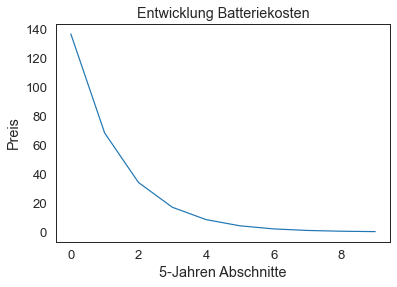

In [32]:
kwh_2020 = 137
exponent = 0.5

y_werte = plot_expon(lambda x: kwh_2020*(np.power(exponent, x)), (0,10))

kwh_2030 = y_werte[2]
print("Batteriekosten im Jahr 2030: CHF {}".format(kwh_2030))

Batterieherstellungskosten 2020 und 2030 berechnen und Delta ausrechnen.

Durchschnittliche Batteriekapazität: 60 kWh

https://ev-database.de/cheatsheet/useable-battery-capacity-electric-car

In [33]:
batterie_kapazität_2020 = 60 #kWh
batterie_preis_2020 = kwh_2020 * batterie_kapazität_2020

batterie_kapazität_2030 = 60 #kWh
batterie_preis_2030 = kwh_2030 * batterie_kapazität_2030

delta_batterie_preis = batterie_preis_2020 - batterie_preis_2030
print("Delta Batteriepreis in CHF: {}".format(delta_batterie_preis))

Delta Batteriepreis in CHF: 6165.0


#### Batteriekosten 2020 - Wahrscheinlichkeitsverteilung 

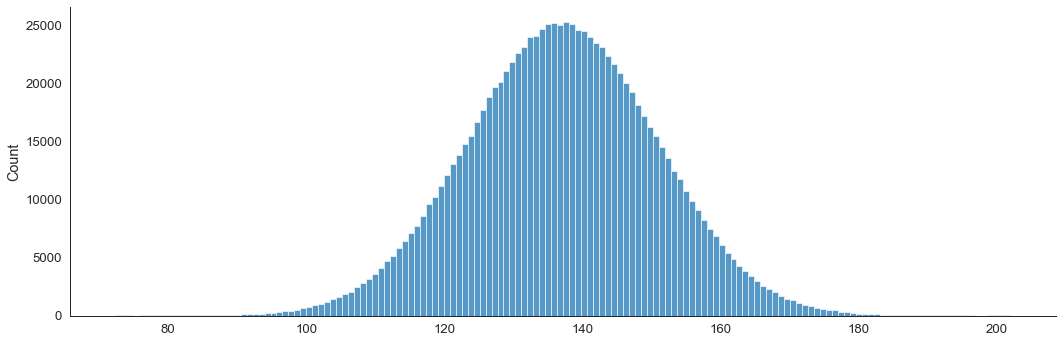

In [28]:
stab_batterie_2020 = kwh_2020 * 0.1

sim_batterie_2020  = np.random.normal(kwh_2020, stab_batterie_2020, 1_000_000)
df_sim_batterie_2020 = pd.DataFrame(sim_batterie_2020)
plot_distr(df_sim_batterie_2020, sim_batterie_2020)

#### Batteriekosten 2030 - Wahrscheinlichkeitsverteilung 

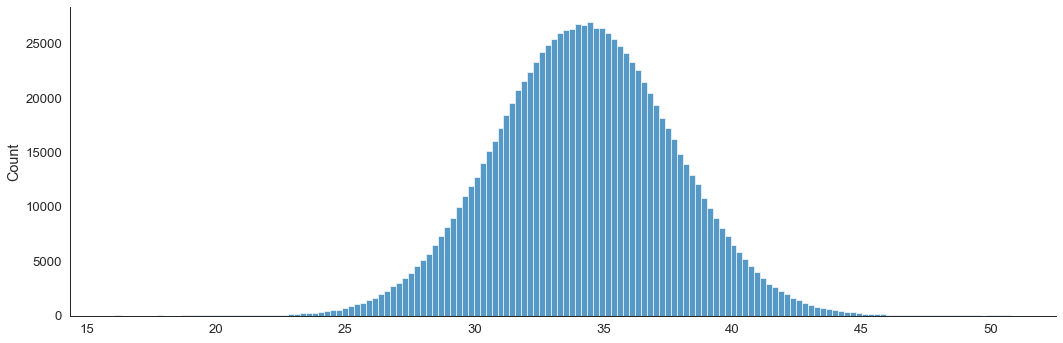

In [29]:
stab_batterie_2030 = kwh_2030 * 0.1

sim_batterie_2030  = np.random.normal(kwh_2030, stab_batterie_2030, 1_000_000)
df_sim_batterie_2030 = pd.DataFrame(sim_batterie_2030)
plot_distr(df_sim_batterie_2030, sim_batterie_2030)

### Subventionen
Die Subventionen sind kantonsbasiert. Wir haben herausgefunden, dass nicht jeder Kanton Subventionen anbietet. Da die sich die Politik mehr und mehr für die Umwelt einsetzt, gehen wir davon aus, dass die Subventionen bis ins Jahr 2030 noch zunehmen werden. Die jährliche Steigung definierten wir bei 2%. 

Variationskoeffizient: 0.1

In [34]:
df_subventionen = pd.read_csv("Subventionen_Trend.csv")
df_subventionen

,Kanton,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Basel-Stadt,5000,5100,5202,5306,5412,5520,5631,5743,5858,5975
1,Wallis,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
2,Tessin,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
3,Genf,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
4,Thurgau,3000,3060,3121,3184,3247,3312,3378,3446,3515,3585
5,Schaffhausen,2000,2040,2081,2122,2165,2208,2252,2297,2343,2390
6,Waadt,1500,1530,1561,1592,1624,1656,1689,1723,1757,1793


In der obenstehenden Tabelle sieht man die 7 Kantone, welche stand 2021 Subventionen auf den Elektroautokauf anbieten.

Nun wollen wir das ganze noch grafisch darstellen.

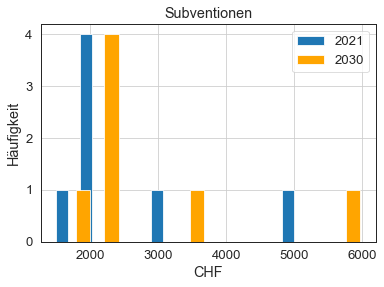

In [35]:
hist = df_subventionen["2021"].hist(bins=20, label="2021")
hist = df_subventionen["2030"].hist(bins=20, label="2030", color="orange")
hist = plt.title("Subventionen")
hist = plt.ylabel("Häufigkeit")
hist = plt.xlabel("CHF")
hist = plt.legend()

#### Subventionen 2021 - Wahrscheinlichkeitsverteilung 

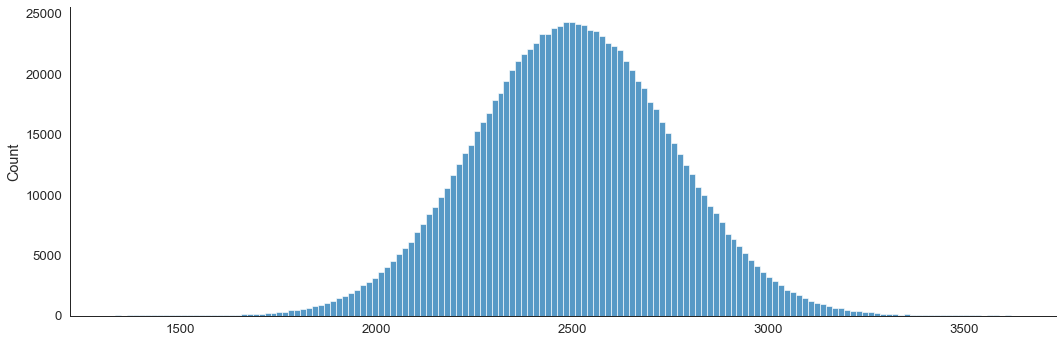

In [36]:
mit_subventionen_2021 = np.mean(df_subventionen["2021"])
stab_subventionen_2021 = mit_subventionen_2021 * 0.1

sim_subventionen_2021  = np.random.normal(mit_subventionen_2021, stab_subventionen_2021, 1_000_000)
df_sim_subventionen_2021 = pd.DataFrame(sim_subventionen_2021)
plot_distr(df_sim_subventionen_2021, sim_subventionen_2021)

#### Subventionen 2030 - Wahrscheinlichkeitsverteilung

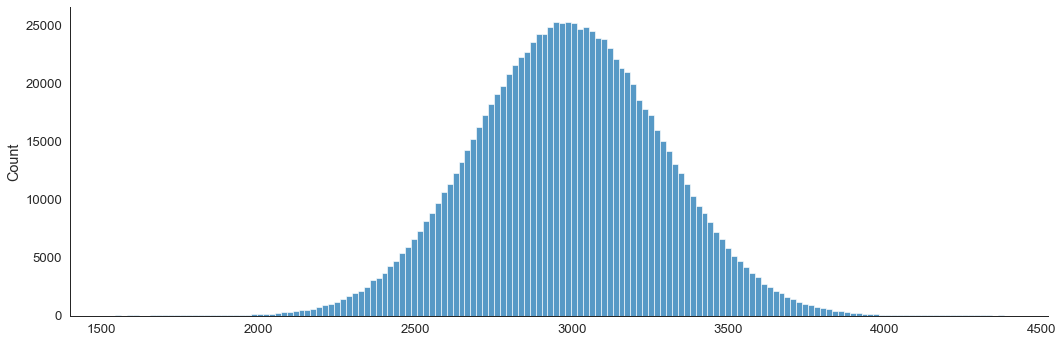

In [37]:
mit_subventionen_2030 = np.mean(df_subventionen["2030"])
stab_subventionen_2030 = mit_subventionen_2030 * 0.1

sim_subventionen_2030  = np.random.normal(mit_subventionen_2030, stab_subventionen_2030, 1_000_000)
df_sim_subventionen_2030 = pd.DataFrame(sim_subventionen_2030)
plot_distr(df_sim_subventionen_2030, sim_subventionen_2030)

### Kaufpreis (Händler)
Hier berechnen wir den Unterschied zwischen dem Kaufpreis eines Elektroautos und dem eines Verbrennerautos. Bei den Elektroautos ziehen wir den Mittelwert der Subventionen ab und berücksichtigen, dass die Batterien immer günstiger werden.

#### Delta Kaufpreis 2021

In [38]:
mit_e_preis_2021 = mit_e_preis - mit_subventionen_2021
delta_auto_preis_2021 = mit_e_preis_2021 - mit_v_preis

print("Kaufpreis Elektroauto: CHF {}".format(mit_e_preis_2021))
print("Kaufpreis Verbrenner: CHF {}".format(mit_v_preis))
print("Preisunterschied effektiv: CHF {}".format(delta_auto_preis_2021))

Kaufpreis Elektroauto: CHF 42070.0
Kaufpreis Verbrenner: CHF 30231.25
Preisunterschied effektiv: CHF 11838.75


#### Delta Kaufpreis 2030

In [39]:
mit_e_preis_2030 = mit_e_preis - mit_subventionen_2030 - delta_batterie_preis
delta_auto_preis_2030 = mit_e_preis_2030 - mit_v_preis

print("Kaufpreis Elektroauto: CHF {}".format(mit_e_preis_2030))
print("Kaufpreis Verbrenner: CHF {}".format(mit_v_preis))
print("Preisunterschied effektiv: CHF {}".format(delta_auto_preis_2030))

Kaufpreis Elektroauto: CHF 35417.42857142857
Kaufpreis Verbrenner: CHF 30231.25
Preisunterschied effektiv: CHF 5186.1785714285725


#### Delta Kaufpreis 2021 - Wahrscheinlichkeitsverteilung

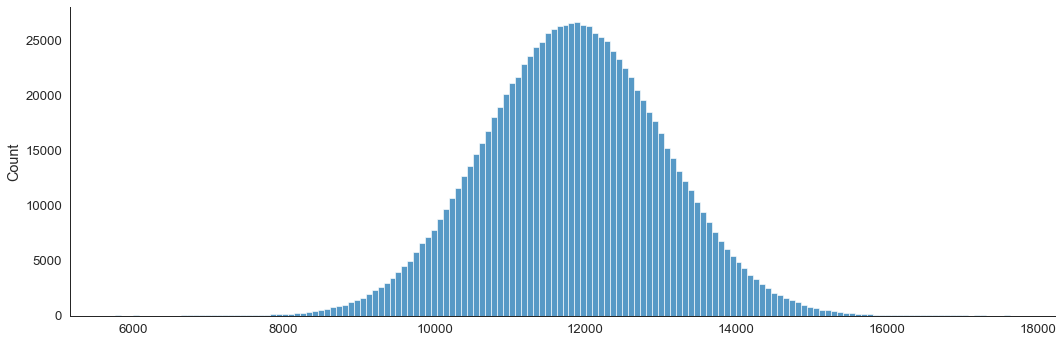

In [40]:
stab_auto_preis_2021 = delta_auto_preis_2021 * 0.1

sim_auto_preis_2021  = np.random.normal(delta_auto_preis_2021, stab_auto_preis_2021, 1_000_000)
df_sim_auto_preis_2021 = pd.DataFrame(sim_auto_preis_2021)
plot_distr(df_sim_auto_preis_2021, sim_auto_preis_2021)

#### Delta Kaufpreis 2030 - Wahrscheinlichkeitsverteilung

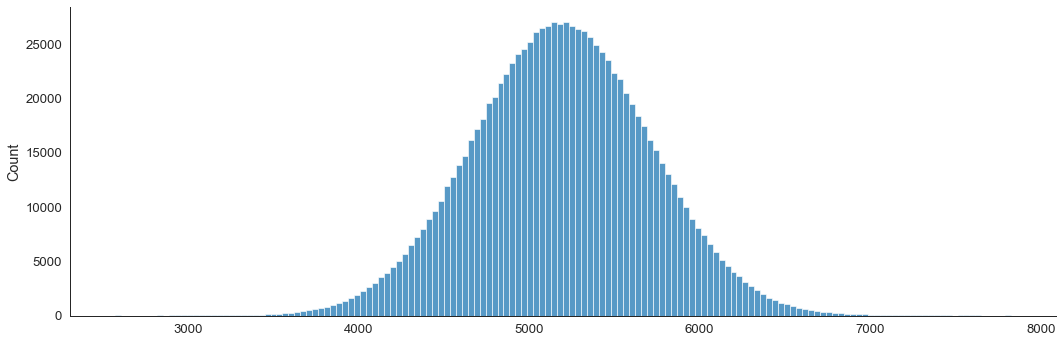

In [41]:
stab_auto_preis_20230 = delta_auto_preis_2030 * 0.1

sim_auto_preis_2030  = np.random.normal(delta_auto_preis_2030, stab_auto_preis_20230, 1_000_000)
df_sim_auto_preis_2030 = pd.DataFrame(sim_auto_preis_2030)
plot_distr(df_sim_auto_preis_2030, sim_auto_preis_2030)

### Kilometerpreis

#### Delta Kilometerpreis 2021
Durchschnittlicher kWh-Verbrauch pro 100km im Jahr 2021 liegt bei 15kWh.

Quelle: https://www.verivox.de/elektromobilitaet/themen/verbrauch-elektroauto/

Der Durchschnittsverbrauch aller Marken lag im Jahr 2020 bei 5,74 Liter

Quelle: https://de.statista.com/statistik/daten/studie/1025654/umfrage/durchschnittlicher-kraftstoffverbrauch-neuer-personenwagen-in-der-schweiz-nach-marke/

In [44]:
verbrauch_kwh_2021 = 15
kosten_kwh_2021 = df_antriebkosten["KWH"][11]
preis_kwh_2021 = verbrauch_kwh_2021 * kosten_kwh_2021
print("Preis kWh pro 100km: CHF {}".format(preis_kwh_2021))

Preis kWh pro 100km: CHF 3.75


In [45]:
verbrauch_bleifrei_2021 = 5.74
kosten_bleifrei_2021 = df_antriebkosten["Bleifrei(95)"][11]
preis_bleifrei_2021 = verbrauch_bleifrei_2021 * kosten_bleifrei_2021
print("Preis Benzin pro 100km: CHF {}".format(preis_bleifrei_2021))

Preis Benzin pro 100km: CHF 9.958900000000002


In [46]:
delta_km_preis_2021 = preis_bleifrei_2021 - preis_kwh_2021
print("Preisunterschied pro 100km: CHF {}".format(delta_km_preis_2021))

Preisunterschied pro 100km: CHF 6.208900000000002


#### Delta Kilometerpreis 2030
Verbrauch Benzin: 2030 sollen die Fahrzeuge im Durchschnitt noch 50% des Benzin- und Dieselverbrauchs pro 100 km aufweisen im Vergleich zu 2021.

- https://co2-gesetz-jetzt.ch/argumente/

Verbrauch KWH: 2030: 13 kWh / 100km
- Seite 11: https://www.ebp.ch/sites/default/files/2020-02/2020-03-02_EBP_CH_EmobSzen_PKW_2020_def.pdf

In [49]:
verbrauch_kwh_2030 = 13
kosten_kwh_2030 = df_antriebkosten_trend["KWH"].iloc[-1]
preis_kwh_2030 = verbrauch_kwh_2030 * kosten_kwh_2030
print("Preis kWh pro 100km: CHF {}".format(preis_kwh_2030))

Preis kWh pro 100km: CHF 3.3085


In [50]:
verbrauch_bleifrei_2030 = 2.9
kosten_bleifrei_2030 = df_antriebkosten["Bleifrei(95)"].iloc[-1]
preis_bleifrei_2030 = verbrauch_bleifrei_2030 * kosten_bleifrei_2030
print("Preis Benzin pro 100km: CHF {}".format(preis_bleifrei_2030))

Preis Benzin pro 100km: CHF 5.0315


In [51]:
delta_km_preis_2030 = preis_bleifrei_2030 - preis_kwh_2030
print("Preisunterschied pro 100km: CHF {}".format(delta_km_preis_2030))

Preisunterschied pro 100km: CHF 1.7230000000000003


#### Delta Kilometerpreis 2021 - Wahrscheinlichkeitsverteilung 

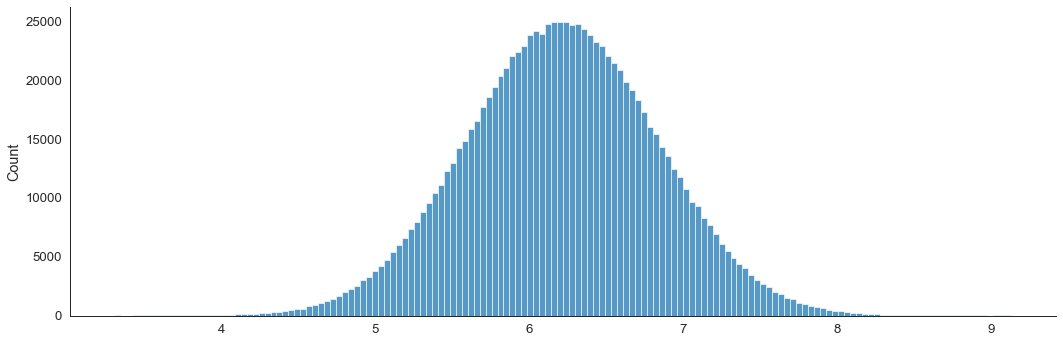

In [52]:
stab_km_preis_2021 = delta_km_preis_2021 * 0.1

sim_km_preis_2021  = np.random.normal(delta_km_preis_2021, stab_km_preis_2021, 1_000_000)
df_sim_km_preis_2021 = pd.DataFrame(sim_km_preis_2021)
plot_distr(df_sim_km_preis_2021, sim_km_preis_2021)

#### Delta Kilometerpreis 2030 - Wahrscheinlichkeitsverteilung 

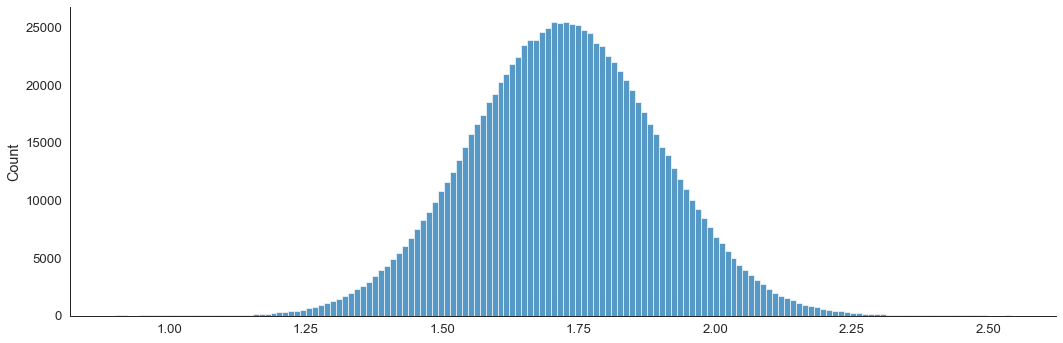

In [53]:
stab_km_preis_2030 = delta_km_preis_2030 * 0.1

sim_km_preis_2030  = np.random.normal(delta_km_preis_2030, stab_km_preis_2030, 1_000_000)
df_sim_km_preis_2030 = pd.DataFrame(sim_km_preis_2030)
plot_distr(df_sim_km_preis_2030, sim_km_preis_2030)

### Kaufbereitschaft

Zuerst berechnen wir die Anzahl Menschen pro Altersgrupe anhand der vorgegebenen Daten durch das Bundesamt für Statistik.
- 20-39 Jahre: 26.3%
- 40-64 Jahre: 35.0%
- 65 Jahre + : 18.8%

https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/stand-entwicklung/bevoelkerung.html

In [54]:
bevölkerung_schweiz = 8_700_000

# Bevölkerung nach alter berechnen
alter_20_39 = bevölkerung_schweiz * (26.3 / 100)
alter_40_64 = bevölkerung_schweiz * (35 / 100)
alter_65 = bevölkerung_schweiz * (18.8 / 100)
alter_über_20 = alter_20_39 + alter_40_64 + alter_65

print("Anzahl Menschen zwischen 20 und 39: {}".format(alter_20_39))
print("Anzahl Menschen zwischen 40 und 64: {}".format(alter_40_64))
print("Anzahl Menschen über 65: {}".format(alter_65))
print("Anzahl Menschen über 20: {}".format(alter_über_20))

Anzahl Menschen zwischen 20 und 39: 2288100.0
Anzahl Menschen zwischen 40 und 64: 3045000.0
Anzahl Menschen über 65: 1635600.0
Anzahl Menschen über 20: 6968700.0


Um die heutige Kaufbereitschaft für ein Elektroauto zu berechnen haben wir folgende Daten gesammtelt:

Kaufbereitschaft 2021 laut TCS: 
- 20-39 Jährige: 66%
- 40-64 Jährige: 59%
- 65+ Jährige: 44%

Quelle: https://www.tcs.ch/de/der-tcs/presse/medienmitteilungen-2021/e-barometer-21.php

In [58]:
bevölkerung = alter_über_20

# Anzahl kaufbereite Menschen berechnen
kaufbereitschaft_alter_20_39 = alter_20_39 * (66 / 100)
kaufbereitschaft_alter_40_64 = alter_40_64 * (59 / 100)
kaufbereitschaft_alter_65 = alter_65 * (44 / 100)

kaufbereitschaft_2021 = kaufbereitschaft_alter_20_39 + kaufbereitschaft_alter_40_64 + kaufbereitschaft_alter_65
print("Anzahl Personen kaufbereit 2021: {}".format(kaufbereitschaft_2021))

prozent_kaufbereitschaft = kaufbereitschaft_2021 * 100 / bevölkerung
print("Prozent Kaufbereitschaft 2021: {}".format(prozent_kaufbereitschaft))

Anzahl Personen kaufbereit 2021: 4026360.0
Prozent Kaufbereitschaft 2021: 57.77777777777778


Anhand unseren Berechnungen konnten wir folgende Fakten feststellen:
- Die Reichweite ist stark gestiegen
- Die Antriebskosten (kWh) sind konstant geblieben
- Die Batteriepreise sind stark gesunken (Einfluss auf Kaufpreis)
- Der Unterschied des Kaufpreises zwischen Elektro- und Verbrennerautos ist konstant geblieben
- Der Kilometerpreis der Elektroautos ist etwas gesunken
- Die Subventionen beim Kauf sind gestiegen (Einfluss auf Kaufpreis)


Jetzt ist die Frage, diese Faktoren die Kaufbereitschaft beeinflussen und wie sensitiv kaufbereite Leute reagieren. Wir definieren die wichtigsten Faktoren der Reihe nach:

1. Reichweite
2. Kaufpreis (Subventionen & Batteriepreise)
3. Kilometerpreis
4. Antriebskosten


Zudem müssen wir die Wahrscheinlichkeit herausfinden, ob eine kaufbereite Person (bei uns im Jahr 2021 57.8%) das Auto auch wirklich in diesem Jahr kauft. Durch langes Diskutieren haben wir angenommen, es handelt sich um 4%. Wir nehmen zudem auch an, dass die Kaufbereitschaft bis 2030 steigen wird und haben bestummen, dass diese um rund 38% steigt. Darum haben wir unsere Parameter für die Berechnung so gesetzt, dass die Kaufbereitschaft in 2030 etwa 38% mehr ist als 2021.

- R = delta Reichweite 2021 - 2030
- KP = delta Kaufpreis 2021 - 2030
- KMP = delta Kilometerpreis 2021 - 2030
- A = delta Antriebskosten 2021 - 2030

In [61]:
R = 1700 * delta_reichw_2030
KP = 900 * delta_auto_preis_2030
KMP = 400 * delta_km_preis_2030
A = (-300) * delta_bleifrei_2030

kaufbereitschaft_2030 = R + KP + KMP + A
print("Total Kaufbereit 2030: {}".format(int(kaufbereitschaft_2030)))

# 5% der Menschen kaufen ein Elektrouto
elektro_kaufbereitschaft = 0.035

Total Kaufbereit 2030: 5562516


#### Kaufbereitschaft 2030 - Wahrscheinlichkeitsverteilung

Kaufbereitschaft in Millionen

COV: 0.2 weil die Kaufbereitschaft etwas stärker schwanken könnte

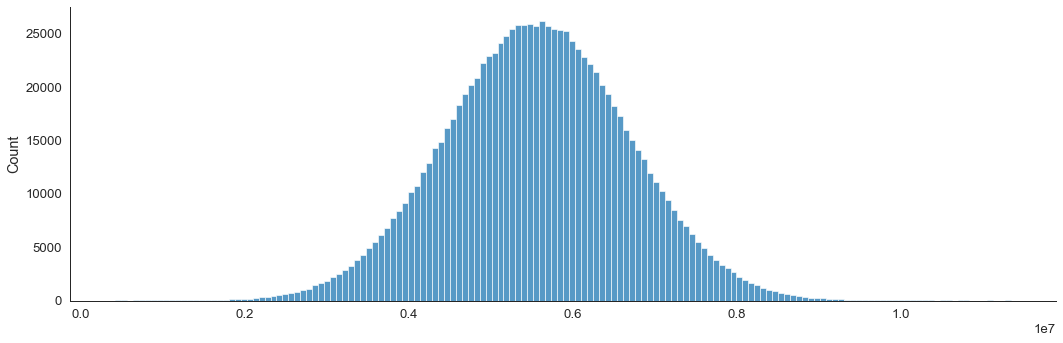

In [62]:
stab_kaufbereitschaft_2021 = kaufbereitschaft_2030 * 0.2

sim_kaufbereitschaft_2021  = np.random.normal(kaufbereitschaft_2030, stab_kaufbereitschaft_2021, 1_000_000)
df_sim_kaufbereitschaft_2021 = pd.DataFrame(sim_kaufbereitschaft_2021)
plot_distr(df_sim_kaufbereitschaft_2021, sim_kaufbereitschaft_2021)

### Anzahl verkaufte Elektroautos in 2030
Hier multiplizieren wir die bestehende Kaufbereitschaft mit dem Wachstum der Kaufbereitschaft um die Kaufbereitschaft im Jahr 2030 zu erhalten. Danach wird diese mit der wirklichen Kaufbereitschaft multipliziert und wir erhalten die Anzahl verkauften Elektroautos in der Schweiz im Jahr 2030.

In [63]:
anzahl_e_auto_2030 = kaufbereitschaft_2030 * elektro_kaufbereitschaft

print("Anzahl verkaufte Elektroautos in 2030: {}".format(int(anzahl_e_auto_2030)))

Anzahl verkaufte Elektroautos in 2030: 194688


#### Verkaufte Autos 2030 - Wahrscheinlichkeitsverteilung
Wir haben die Variationskoeffizienten bei 0.08 definiert, da die Anzahl verkaufte Elektroautos zwischen 140'000 und 220'000 für uns plausibel klingt

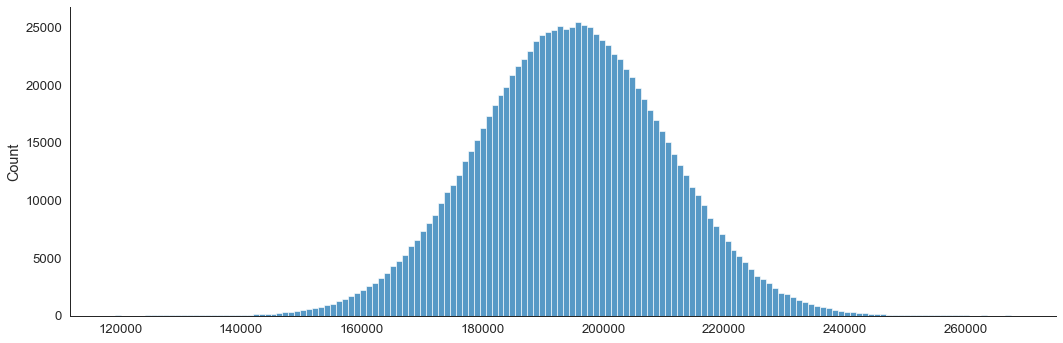

In [64]:
stab_verkaufte_autos = anzahl_e_auto_2030 * 0.08

sim_verkaufte_autos_2030 = np.random.normal(anzahl_e_auto_2030, stab_verkaufte_autos, 1_000_000)
df_sim_verkaufte_autos_2030 = pd.DataFrame(sim_verkaufte_autos_2030)
plot_distr(df_sim_verkaufte_autos_2030, sim_verkaufte_autos_2030)

**Wachstum pro Jahr**

Im Jahr 2020 betrug die Anzahl verkaufte Elektroautos in der Schweiz 19'765. Damit können wir das erforderliche Wachstum pro Jahr ausrechnen, um auf unsere Lösung zu kommen.

In [68]:
jahr_2020 = 19765
jahr_2030 = anzahl_e_auto_2030

p = 100 * ((jahr_2030 / jahr_2020)**(1/10)-1)
print("Jährliches Wachstum: {}%".format(p))

Jährliches Wachstum: 25.702597831417485%
